# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

print("Beginning Data Retrieval")
print("------------------------")

cloudiness = []
country = []
date = []
humidity = []
longitude = []
latitude = []
max_temp = []
wind_speed = []

index = 1
num_of_set = 1

for i, city in enumerate(cities):
    if i % 50 == 0:
        num_of_set += 1
        index = 1
        time.sleep(60)
        
    target_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    response = requests.get(target_url)
    data = response.json()
    
    print(f"Processing Record {index} of Set {num_of_set-1}| {city}")
    index += 1
    
    try:
        cloudiness.append(data["clouds"]["all"])
        country.append(data["sys"]["country"])
        date.append(data["dt"])
        humidity.append(data["main"]["humidity"])
        longitude.append(data["coord"]["lon"])
        latitude.append(data["coord"]["lat"])
        max_temp.append(data["main"]["temp_max"])
        wind_speed.append(data["wind"]["speed"])
    
    except:
        print("City not found. Skipping...")

print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1| rikitea
Processing Record 2 of Set 1| ancud
Processing Record 3 of Set 1| kapaa
Processing Record 4 of Set 1| cabo san lucas
Processing Record 5 of Set 1| bluff
Processing Record 6 of Set 1| ketchikan
Processing Record 7 of Set 1| saint-philippe
Processing Record 8 of Set 1| lompoc
Processing Record 9 of Set 1| coquimbo
Processing Record 10 of Set 1| ushuaia
Processing Record 11 of Set 1| hermanus
Processing Record 12 of Set 1| hasaki
Processing Record 13 of Set 1| livingstonia
Processing Record 14 of Set 1| port elizabeth
Processing Record 15 of Set 1| ajdabiya
Processing Record 16 of Set 1| hilo
Processing Record 17 of Set 1| semey
Processing Record 18 of Set 1| vaitupu
City not found. Skipping...
Processing Record 19 of Set 1| port alfred
Processing Record 20 of Set 1| koumra
Processing Record 21 of Set 1| baruun-urt
Processing Record 22 of Set 1| vaini
Processing Record 23 of Set 1| birjand
Processing R

Processing Record 41 of Set 4| bangassou
Processing Record 42 of Set 4| kaitangata
Processing Record 43 of Set 4| paulo afonso
Processing Record 44 of Set 4| diffa
Processing Record 45 of Set 4| warrnambool
Processing Record 46 of Set 4| matay
Processing Record 47 of Set 4| dekoa
City not found. Skipping...
Processing Record 48 of Set 4| teseney
Processing Record 49 of Set 4| saint-augustin
Processing Record 50 of Set 4| katsuura
Processing Record 1 of Set 5| mazara del vallo
Processing Record 2 of Set 5| los barrios
Processing Record 3 of Set 5| mokhsogollokh
Processing Record 4 of Set 5| portland
Processing Record 5 of Set 5| zempoala
Processing Record 6 of Set 5| pevek
Processing Record 7 of Set 5| tiksi
Processing Record 8 of Set 5| tazovskiy
Processing Record 9 of Set 5| natal
Processing Record 10 of Set 5| winsum
Processing Record 11 of Set 5| toyo
Processing Record 12 of Set 5| porto novo
Processing Record 13 of Set 5| saldanha
Processing Record 14 of Set 5| kingston
Processing 

Processing Record 35 of Set 8| skelleftea
Processing Record 36 of Set 8| ostrovnoy
Processing Record 37 of Set 8| madaoua
Processing Record 38 of Set 8| luanda
Processing Record 39 of Set 8| idenao
Processing Record 40 of Set 8| ust-kulom
Processing Record 41 of Set 8| the valley
Processing Record 42 of Set 8| port lincoln
Processing Record 43 of Set 8| suntar
Processing Record 44 of Set 8| tamale
Processing Record 45 of Set 8| aden
Processing Record 46 of Set 8| kijang
Processing Record 47 of Set 8| mananjary
Processing Record 48 of Set 8| haines junction
Processing Record 49 of Set 8| portales
Processing Record 50 of Set 8| samusu
City not found. Skipping...
Processing Record 1 of Set 9| rogun
City not found. Skipping...
Processing Record 2 of Set 9| eirunepe
Processing Record 3 of Set 9| san patricio
Processing Record 4 of Set 9| burnie
Processing Record 5 of Set 9| pandan
Processing Record 6 of Set 9| ullapool
Processing Record 7 of Set 9| calvillo
Processing Record 8 of Set 9| por

Processing Record 27 of Set 12| asosa
Processing Record 28 of Set 12| batagay-alyta
Processing Record 29 of Set 12| coswig
Processing Record 30 of Set 12| tunduru
City not found. Skipping...
Processing Record 31 of Set 12| rock sound
Processing Record 32 of Set 12| chumikan
Processing Record 33 of Set 12| warah
Processing Record 34 of Set 12| narang
Processing Record 35 of Set 12| paciran
Processing Record 36 of Set 12| totness
Processing Record 37 of Set 12| nhulunbuy
Processing Record 38 of Set 12| tahta
Processing Record 39 of Set 12| powell
Processing Record 40 of Set 12| valparaiso
Processing Record 41 of Set 12| amursk
Processing Record 42 of Set 12| gazli
Processing Record 43 of Set 12| ushtobe
Processing Record 44 of Set 12| yabelo
Processing Record 45 of Set 12| traverse city
Processing Record 46 of Set 12| pala
Processing Record 47 of Set 12| truth or consequences
Processing Record 48 of Set 12| karlstad
Processing Record 49 of Set 12| barabai
Processing Record 50 of Set 12| 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Checking length of all columns
print(len(cities), len(cloudiness), len(country), len(date), 
      len(humidity), len(longitude), len(latitude), 
      len(max_temp), len(wind_speed))

cities_weather = {"City": cities, 
                  "Cloudiness": cloudiness, 
                  "Country": country, 
                  "Date": date, 
                  "Humidity": humidity,
                  "Latitude": latitude, 
                  "Longitude": longitude, 
                  "Max Temp": max_temp, 
                  "Wind Speed": wind_speed}

cities_weather_df = pd.DataFrame({key:pd.Series(value) for key, value in cities_weather.items()})
cities_weather_df

636 582 582 582 582 582 582 582 582


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,rikitea,19.0,PF,1.620629e+09,77.0,-23.1203,-134.9692,77.74,15.12
1,ancud,3.0,CL,1.620629e+09,93.0,-41.8697,-73.8203,41.00,8.05
2,kapaa,20.0,US,1.620629e+09,73.0,22.0752,-159.3190,75.20,13.80
3,cabo san lucas,0.0,MX,1.620629e+09,63.0,22.8909,-109.9124,79.00,13.56
4,bluff,0.0,NZ,1.620629e+09,77.0,-46.6000,168.3333,59.00,5.01
...,...,...,...,...,...,...,...,...,...
631,neiafu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,son la,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,aykhal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,kudahuvadhoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
clean_cities_weather_df = cities_weather_df.dropna()
clean_cities_weather_df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,rikitea,19.0,PF,1.620629e+09,77.0,-23.1203,-134.9692,77.74,15.12
1,ancud,3.0,CL,1.620629e+09,93.0,-41.8697,-73.8203,41.00,8.05
2,kapaa,20.0,US,1.620629e+09,73.0,22.0752,-159.3190,75.20,13.80
3,cabo san lucas,0.0,MX,1.620629e+09,63.0,22.8909,-109.9124,79.00,13.56
4,bluff,0.0,NZ,1.620629e+09,77.0,-46.6000,168.3333,59.00,5.01
...,...,...,...,...,...,...,...,...,...
577,batagay-alyta,75.0,TO,1.620630e+09,78.0,-18.6500,-173.9833,75.20,11.50
578,coswig,100.0,VN,1.620630e+09,57.0,21.3167,103.9000,84.63,2.06
579,tunduru,100.0,RU,1.620630e+09,88.0,66.0000,111.5000,28.78,13.85
580,rock sound,99.0,MV,1.620630e+09,70.0,2.6708,72.8944,85.26,6.42


In [9]:
clean_cities_weather_df.to_csv(r"cities_data_file.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
def humidity_over_100(s):
    over_100 = s.to_numpy()
    return (over_100[0] > 100).all()
humidity_over_100(clean_cities_weather_df["Humidity"])

False

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

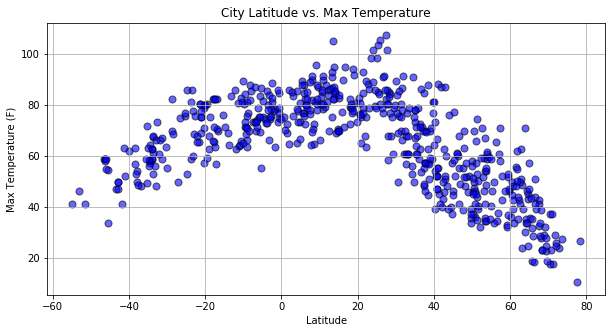

<Figure size 432x288 with 0 Axes>

In [11]:
latitude_values = clean_cities_weather_df["Latitude"]
temp_values = clean_cities_weather_df["Max Temp"]
plt.figure(figsize=(10,5))
plt.scatter(latitude_values, temp_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
plt.tight_layout()

## Latitude vs. Humidity Plot

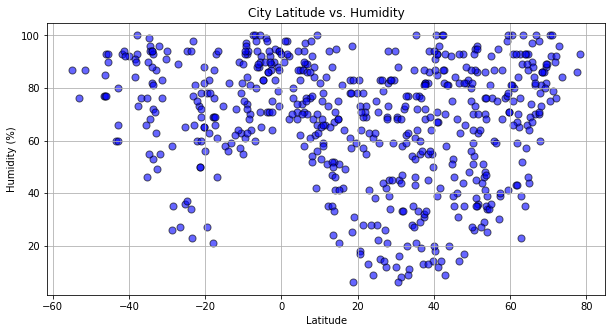

<Figure size 432x288 with 0 Axes>

In [12]:
humidity_values = clean_cities_weather_df["Humidity"]
plt.figure(figsize=(10,5))
plt.scatter(latitude_values, humidity_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
plt.tight_layout()

## Latitude vs. Cloudiness Plot

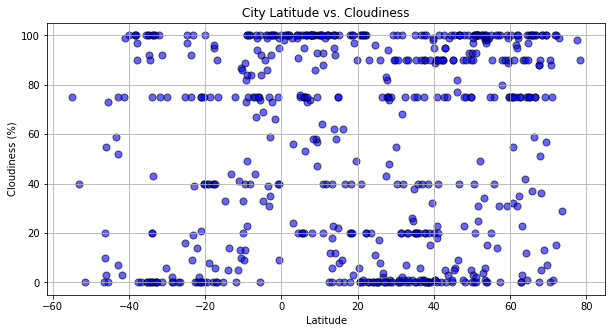

<Figure size 432x288 with 0 Axes>

In [13]:
cloud_values = clean_cities_weather_df["Cloudiness"]
plt.figure(figsize=(10,5))
plt.scatter(latitude_values, cloud_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
plt.tight_layout()

## Latitude vs. Wind Speed Plot

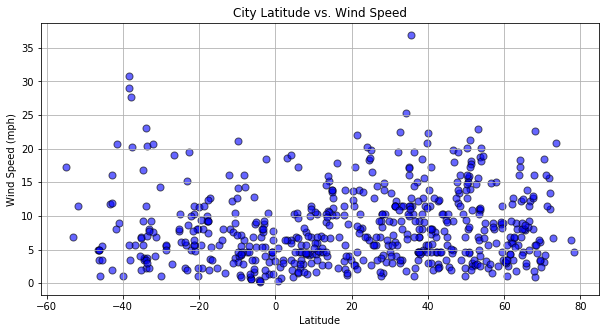

<Figure size 432x288 with 0 Axes>

In [14]:
wind_values = clean_cities_weather_df["Wind Speed"]
plt.figure(figsize=(10,5))
plt.scatter(latitude_values, wind_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()
plt.tight_layout()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8087100542076745


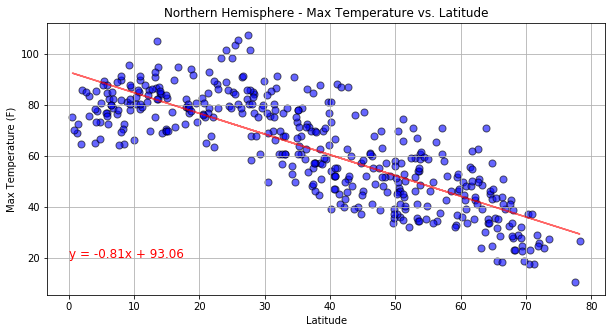

In [15]:
# Northern Hemisphere: Latitude > 0 Degrees
northern_hemisphere = clean_cities_weather_df["Latitude"] > 0
northern_hemisphere_table = clean_cities_weather_df[northern_hemisphere]
x_values = northern_hemisphere_table["Latitude"]
y_values = northern_hemisphere_table["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(0,20),fontsize=12,color="red")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7245528021251042


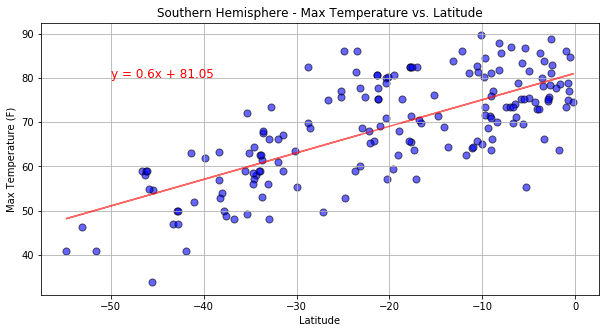

In [16]:
# Southern Hemisphere: Latitude < 0 Degrees
southern_hemisphere = clean_cities_weather_df["Latitude"] < 0
southern_hemisphere_table = clean_cities_weather_df[southern_hemisphere]
x_values = southern_hemisphere_table["Latitude"]
y_values = southern_hemisphere_table["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(-50,80),fontsize=12,color="red")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.09640909427184347


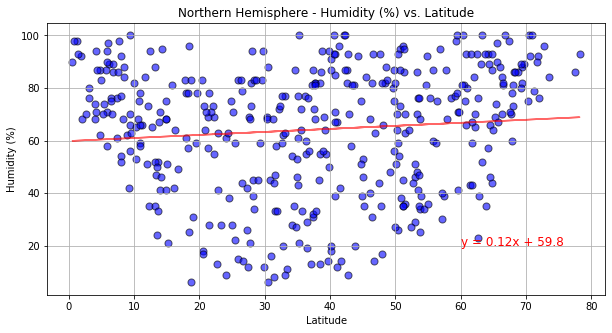

In [17]:
x_values = northern_hemisphere_table["Latitude"]
y_values = northern_hemisphere_table["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(60,20),fontsize=12,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.07798119329151368


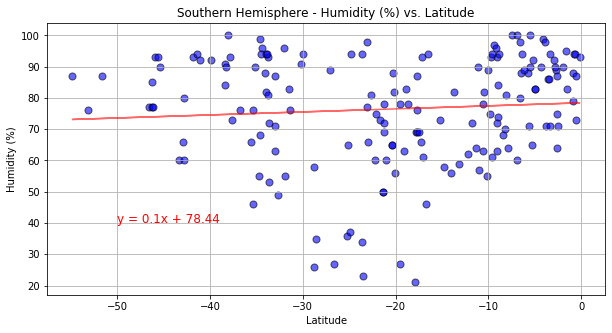

In [18]:
x_values = southern_hemisphere_table["Latitude"]
y_values = southern_hemisphere_table["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(-50,40),fontsize=12,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.034477798479124105


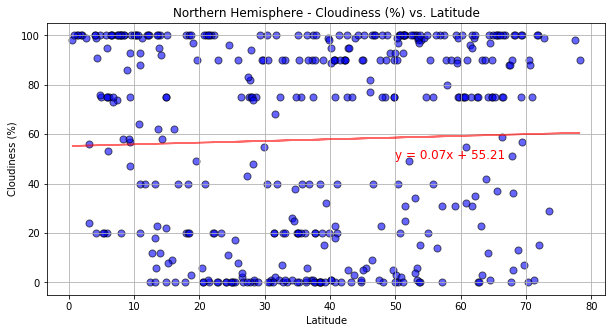

In [19]:
x_values = northern_hemisphere_table["Latitude"]
y_values = northern_hemisphere_table["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(50,50),fontsize=12,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.23587013275525487


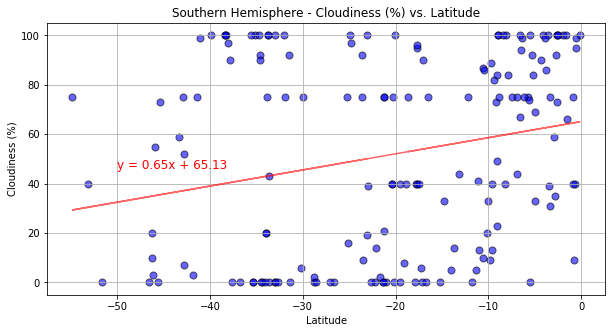

In [20]:
x_values = southern_hemisphere_table["Latitude"]
y_values = southern_hemisphere_table["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(-50,46),fontsize=12,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.11627595900158194


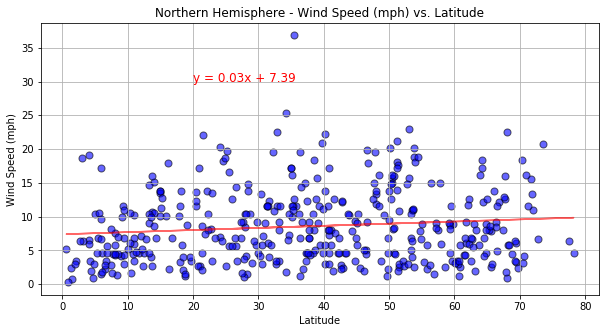

In [21]:
x_values = northern_hemisphere_table["Latitude"]
y_values = northern_hemisphere_table["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(20,30),fontsize=12,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.24565536834289786


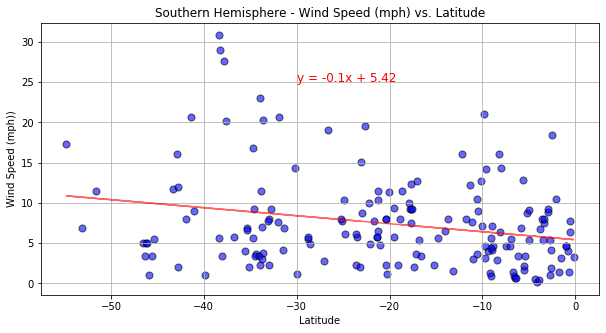

In [24]:
x_values = southern_hemisphere_table["Latitude"]
y_values = southern_hemisphere_table["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r-value is {st.pearsonr(x_values,y_values)[0]}")

plt.figure(figsize=(10,5))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", alpha=0.6, edgecolor="black", s=50)
plt.plot(x_values,regress_values,"r-", alpha=0.6)
plt.annotate(line_eq,(-30,25),fontsize=12,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")
plt.grid()
plt.show()